# Breast cancer dataset

In this markdown we will use different classification technologies to 
determine which performs well with the dataset provided. Namely
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machines

We will also try some standard data processing methods to see how it
influences the results. Specifically
- Removing highly correlated variables
- Missing data

To evaluate the results we will use the F1-score. This score takes
recall and precision into consideration and gives us a much better
look at the results, rather than just accuracy.

In [263]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import f1_score

In [264]:
import warnings
warnings.filterwarnings('ignore')

### Loading data and removing non-relevant columns

In [265]:
df = pd.read_csv('breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [266]:
df = df.drop('Unnamed: 32', axis = 1)
df = df.drop('id', axis = 1)

In [267]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We generate labels, denoted by Y (diagnosis column) and the rest of the data will be denoted by X

In [268]:
labels = df['diagnosis']
Y = [1 if ele == "M" else 0 for ele in labels] #convert labels M and B to binary(1 and 0)

df = df.drop('diagnosis', axis=1)#drop the diagnosis column from the dataframe



We are only interested in the columns with the suffix _mean for our analysis

In [269]:
#df.columns
cols = [c for c in df.columns if c.endswith('mean')]
X = df[cols]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## Splitting data for training and testing

We will use the *train_test_split* function to split our dataset.
The *test_size* parameter tells the method to kepp 80% training and 20% testing.
The *stratify* parameter tells the method to keep the same propportion of success and failures in the different sets.

Cross validation is a common method to make sure that all data points have an opportunity to be part of the test and the training dataset. If we were to use a 10x cross validation we would get 10 different f-scores. However, here we will use a bootstrapping method to randomly create the test and training dataset 100 times and build a distribution of the F-score. From the distribution we will take the 5th and 95th highest value which provide a 90% confidence interval.

Finally, for the predictions, we can calculate two different scores: training score and testing score. The training score is simply predicting the values based on the same dataset that we built the prediction. This presumably gives us the best possible performance for our model. The testing score is based on the predictions using the test set. This is the more fair comparison since we are designing our model to work for new data. There are three scenarios when comparing the two different scores:
* testing score == training score : This means that there is no bias in the model and it should be able to predict new data as expected.
* testing score < training score : This is what we would expect for the most part, however a large difference in the two suggests that the model is overfitting, the model is too specific to the training set and not so useful in analyzing new data.
* testing score > training score : This is a much surprising result, however it means that the model is underfitting. 



In [270]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y)

### Logistic Regression

In [271]:
def logreg(X_train, X_test, Y_train, Y_test):
    clf = LogisticRegression().fit(X_train, Y_train)
    Y_train_predicted = clf.predict(X_train)
    train_score = f1_score(Y_train, Y_train_predicted)
    Y_test_predicted = clf.predict(X_test)
    test_score = f1_score(Y_test, Y_test_predicted)
    return [train_score, test_score]

In [272]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y)
    score[i,]=(logreg(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.86322188 0.8       ]
95% [0.89506173 0.9382716 ]


Text(0.5, 1.0, 'Logistic Regression')

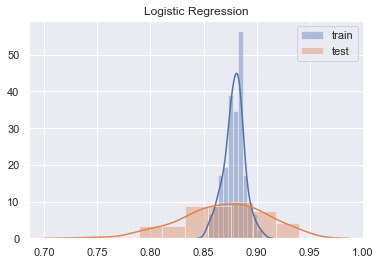

In [273]:
sns.set(font_scale=1)
sns.distplot(score[:,0], label="train")
sns.distplot(score[:,1], label="test")
plt.legend()
plt.title("Logistic Regression")

### Decision Tree Classifier

In [274]:
def decisiontree(X_train, X_test, Y_train, Y_test):
    clf = DecisionTreeClassifier(criterion="gini").fit(X_train, Y_train)
    Y_train_predicted = clf.predict(X_train)
    train_score = f1_score(Y_train, Y_train_predicted)
    Y_test_predicted = clf.predict(X_test)
    test_score = f1_score(Y_test, Y_test_predicted)
    return [train_score, test_score]

In [275]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y)
    score[i,]=(decisiontree(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.83950617]
95% [1.         0.94117647]


Text(0.5, 1.0, 'Decision Trees')

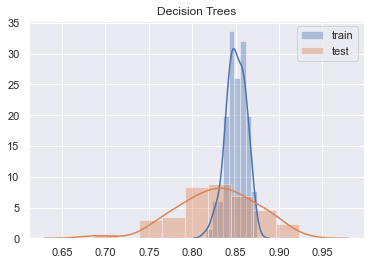

In [276]:
sns.set(font_scale=1)
sns.distplot(train_score, label="train")
sns.distplot(test_score, label="test")
plt.legend()
plt.title("Decision Trees")

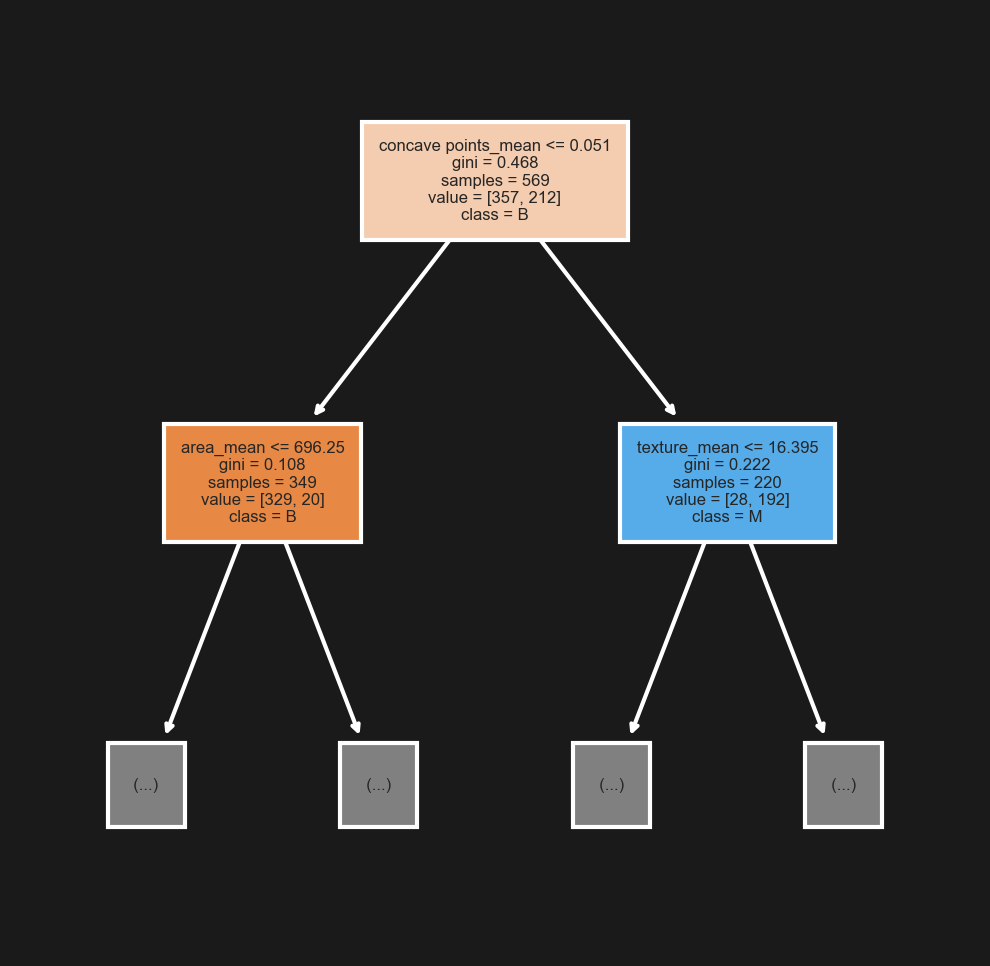

In [277]:
from sklearn import tree
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3).fit(X, Y)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300, facecolor="k")
tree.plot_tree(clf_gini,
               max_depth=1,
               feature_names = X.columns,
               class_names= ["B","M"],
               filled = True,
              fontsize=4,
              )
fig.savefig('decision_tree.png')


### Random Forest Classifier 

In [278]:
def randomforest(X_train, X_test, Y_train, Y_test):
    clf = RandomForestClassifier().fit(X_train, Y_train)
    Y_train_predicted = clf.predict(X_train)
    train_score = f1_score(Y_train, Y_train_predicted)
    Y_test_predicted = clf.predict(X_test)
    test_score = f1_score(Y_test, Y_test_predicted)
    return [train_score, test_score]

In [279]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y)
    score[i,]=(randomforest(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.86666667]
95% [1.         0.96470588]


Text(0.5, 1.0, 'Random Forest')

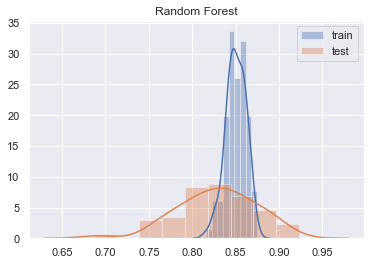

In [280]:
sns.set(font_scale=1)
sns.distplot(train_score, label="train")
sns.distplot(test_score, label="test")
plt.legend()
plt.title("Random Forest")

### SVM

In [281]:
def mysvm(X_train, X_test, Y_train, Y_test):
    clf = svm.SVC().fit(X_train, Y_train)
    Y_train_predicted = clf.predict(X_train)
    train_score = f1_score(Y_train, Y_train_predicted)
    Y_test_predicted = clf.predict(X_test)
    test_score = f1_score(Y_test, Y_test_predicted)
    return [train_score, test_score]

In [282]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y)
    score[i,]=(mysvm(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.8        0.76056338]
95% [0.85245902 0.8974359 ]


Text(0.5, 1.0, 'SVM')

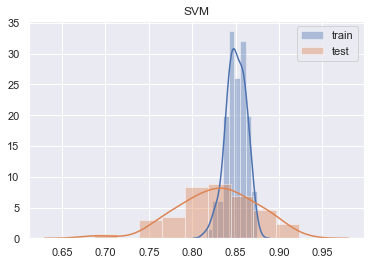

In [283]:
sns.set(font_scale=1)
sns.distplot(train_score, label="train")
sns.distplot(test_score, label="test")
plt.legend()
plt.title("SVM")

# Removing highly correlated variables

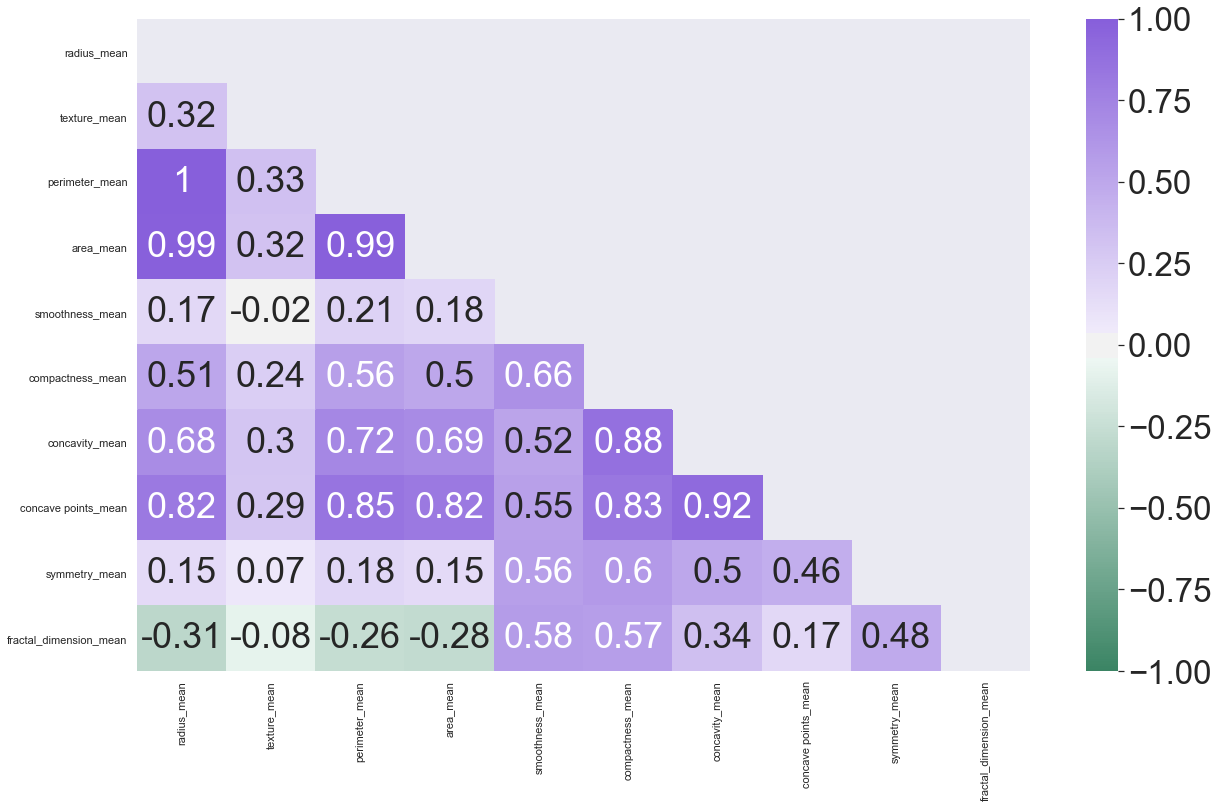

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X.corr().round(2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20,12))
sns.set(font_scale=3)
cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(corr_matrix, mask = mask, annot=True, 
            cmap= cmap, vmin=-1, vmax=1)

In [285]:
X_select = X.copy()
X_select = X_select.drop(['perimeter_mean','area_mean','concavity_mean'], axis = 1)

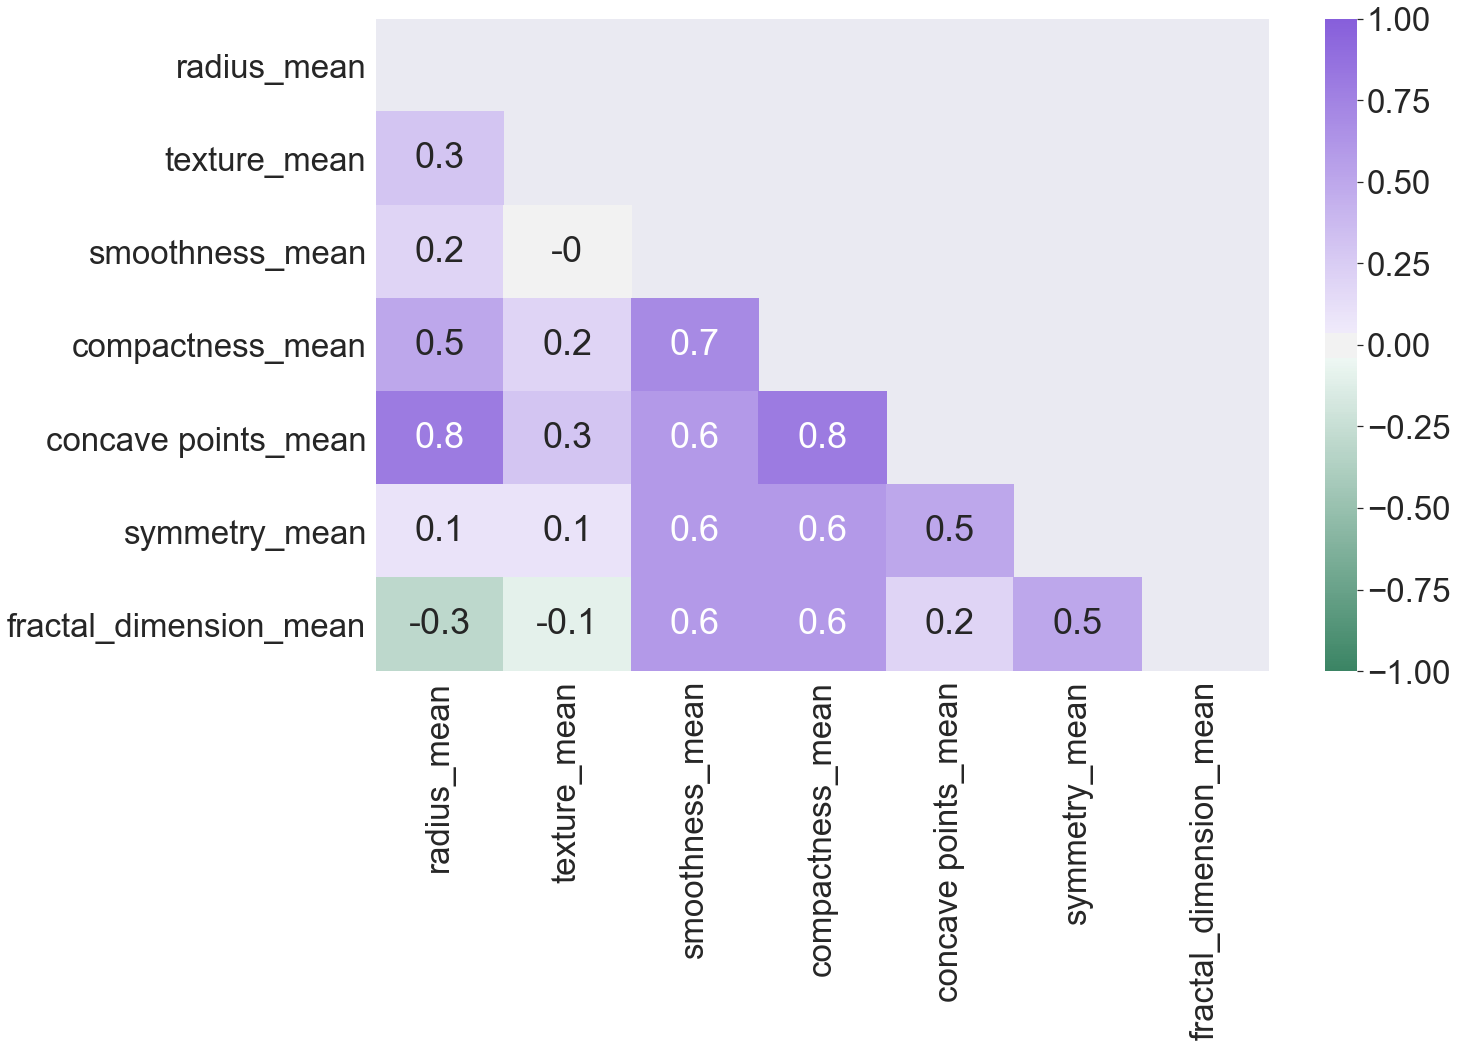

In [286]:
corr_matrix = X_select.corr().round(1)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20,12))
sns.set(font_scale=3)
cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap= cmap, vmin=-1, vmax=1)

### Logistic Regression

In [287]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    score[i,]=(logreg(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.83950617 0.78481013]
95% [0.87195122 0.925     ]


### Decision Tree

In [288]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    score[i,]=(decisiontree(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.        0.8372093]
95% [1.         0.93181818]


### Random Forest

In [289]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    score[i,]=(randomforest(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.85714286]
95% [1.         0.95348837]


### SVM

In [290]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    score[i,]=(mysvm(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.83116883 0.79452055]
95% [0.87037037 0.90909091]


# Missing data

In [291]:
import random
random.seed(123)
def get_data_with_missing_values(data, portion_to_remove):
    data_copy = data.copy()
    ix = [(row, col) for row in range(data_copy.shape[0]) for col in range(data_copy.shape[1])]
    for row, col in random.sample(ix, int(round(portion_to_remove*len(ix)))):
        data_copy.iat[row, col] = np.nan
    return data_copy

In [292]:
X_missing = get_data_with_missing_values(X_select, 0.25)


In [293]:
X_missing.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,NaN,0.1184,NaN,0.1471,0.2419,NaN
1,20.57,17.77,NaN,0.07864,NaN,0.1812,NaN
2,19.69,21.25,0.1096,NaN,0.1279,0.2069,0.05999
3,NaN,20.38,0.1425,NaN,0.1052,0.2597,NaN
4,20.29,14.34,0.1003,0.13280,0.1043,0.1809,0.05883


## Remove rows with missing values

In [294]:
def remove_missing_data_row(data):
    df = data.copy()
    df = df.dropna()
    return df

In [295]:
X_missing['diagnosis']=Y
removed_data = remove_missing_data_row(X_missing)
Y_missing_removed = removed_data['diagnosis']
X_missing_removed = removed_data.drop("diagnosis", axis=1)
X_missing_removed.head(20)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
4,20.290,14.34,0.10030,0.13280,0.10430,0.1809,0.05883
14,13.730,22.61,0.11310,0.22930,0.08025,0.2069,0.07682
44,13.170,21.81,0.09714,0.10470,0.05252,0.1746,0.06177
67,11.310,19.04,0.08139,0.04701,0.02230,0.1516,0.05667
68,9.029,17.33,0.10660,0.14130,0.04375,0.2111,0.08046
87,19.020,24.59,0.09029,0.12060,0.08271,0.1953,0.05629
100,13.610,24.98,0.09488,0.08511,0.04489,0.1609,0.05871
101,6.981,13.43,0.11700,0.07568,0.00000,0.1930,0.07818
109,11.340,21.26,0.08759,0.06575,0.01899,0.1487,0.06529
119,17.950,20.01,0.08402,0.06722,0.05596,0.2129,0.05025


In [296]:
X_train_missing_removed.shape

(54, 7)

In [297]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    X_missing = get_data_with_missing_values(X_train, 0.25)
    X_missing['diagnosis']=Y_train
    removed_data = remove_missing_data_row(X_missing)
    Y_missing_removed = removed_data['diagnosis']
    X_missing_removed = removed_data.drop("diagnosis", axis=1)
    score[i,]=(logreg(X_missing_removed, X_test, Y_missing_removed, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.75       0.77142857]
95% [0.95      0.8974359]


In [298]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    X_missing = get_data_with_missing_values(X_train, 0.25)
    X_missing['diagnosis']=Y_train
    removed_data = remove_missing_data_row(X_missing)
    Y_missing_removed = removed_data['diagnosis']
    X_missing_removed = removed_data.drop("diagnosis", axis=1)
    score[i,]=(decisiontree(X_missing_removed, X_test, Y_missing_removed, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95]) 

5% [1.         0.76744186]
95% [1.         0.92134831]


In [299]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    X_missing = get_data_with_missing_values(X_train, 0.25)
    X_missing['diagnosis']=Y_train
    removed_data = remove_missing_data_row(X_missing)
    Y_missing_removed = removed_data['diagnosis']
    X_missing_removed = removed_data.drop("diagnosis", axis=1)
    score[i,]=(randomforest(X_missing_removed, X_test, Y_missing_removed, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.84210526]
95% [1.         0.93975904]


In [300]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    X_missing = get_data_with_missing_values(X_train, 0.25)
    X_missing['diagnosis']=Y_train
    removed_data = remove_missing_data_row(X_missing)
    Y_missing_removed = removed_data['diagnosis']
    X_missing_removed = removed_data.drop("diagnosis", axis=1)
    score[i,]=(mysvm(X_missing_removed, X_test, Y_missing_removed, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.60869565 0.64516129]
95% [0.92307692 0.875     ]


## Imputing values

In [301]:
#!pip install sklearn.experimental
#from platform import python_version
#print(python_version())

In [302]:
def impute_missing_data(data):
    data.fillna(data.median(), inplace=True)
    return data



In [303]:
X_imputed = impute_missing_data(X_missing)
X_imputed.head(20)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
216,11.89,18.35,0.09363,0.11540,0.031420,0.1967,0.06314,0
283,16.24,18.77,0.10660,0.08575,0.090520,0.1876,0.06684,1
201,17.54,19.32,0.08968,0.08575,0.074880,0.1506,0.05491,1
180,27.22,21.87,0.09684,0.19140,0.187800,0.1800,0.05770,1
252,19.73,19.82,0.09684,0.18490,0.097400,0.1793,0.06127,1
307,9.00,14.40,0.09684,0.03116,0.003472,0.1788,0.06833,0
471,12.04,28.14,0.09684,0.06000,0.033950,0.1793,0.05698,0
173,11.08,18.76,0.10060,0.05743,0.025830,0.1566,0.06127,0
328,13.40,20.71,0.11690,0.13190,0.084880,0.1948,0.06277,1
515,11.34,18.76,0.09684,0.08499,0.025940,0.1927,0.06211,0


In [304]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    X_missing = get_data_with_missing_values(X_train, 0.25)
    X_missing_imputed = impute_missing_data(X_missing)
    score[i,]=(logreg(X_missing_imputed, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.72131148 0.8045977 ]
95% [0.78456592 0.92682927]


In [305]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    X_missing = get_data_with_missing_values(X_train, 0.25)
    X_missing_imputed = impute_missing_data(X_missing)
    score[i,]=(decisiontree(X_missing_imputed, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.77108434]
95% [1.         0.91764706]


In [306]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    X_missing = get_data_with_missing_values(X_train, 0.25)
    X_missing_imputed = impute_missing_data(X_missing)
    score[i,]=(randomforest(X_missing_imputed, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.85057471]
95% [1.         0.95121951]


In [307]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    X_missing = get_data_with_missing_values(X_train, 0.25)
    X_missing_imputed = impute_missing_data(X_missing)
    score[i,]=(mysvm(X_missing_imputed, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.67169811 0.77333333]
95% [0.75342466 0.9       ]


# Important variables
Since Random Forest appears to perform the best, let's use the shuffle test on the different variables to see which has the most dramatics affect on the f1_score

In [308]:
def shuffle_all_cols (X_train, Y_train, X_test, Y_test):
    X_columns = list(X_train.columns)
    X_train.reset_index(inplace=True, drop=True)
    X_original=X_train.copy()
    #print(X_original.head())
    shuffle_data_df = pd.DataFrame(columns=X_train.columns, index=[0])
    
    for cols in X_columns:
        #print("**********************************")
        #print(cols)
        column_to_shuffle = X_train[cols]
        column_to_shuffle = column_to_shuffle.sample(frac=1)
        column_to_shuffle.reset_index(inplace=True, drop=True)
        X_train[cols]=column_to_shuffle
        #print(X_train.head())
        Y_predicted_rf_f1 = decisiontree(X_train, Y_train, X_test, Y_test)
        #print("Train F1-score: ", round(Y_predicted_rf_f1[0], 2))
        #print("Test F1-score: ", round(Y_predicted_rf_f1[1],2))
        shuffle_data_df.loc[0,cols]=Y_predicted_rf_f1[1]
        
        X_train=X_original
    
    return shuffle_data_df
    


In [309]:
X_select.shape

(569, 7)

In [310]:
score=np.zeros(shape=(100,7))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=Y)
    score[i,]=shuffle_all_cols(X_train, X_test, Y_train, Y_test)

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.79518072 0.78651685 0.77272727 0.77333333 0.71428571 0.68181818
 0.65116279]
95% [0.91954023 0.90243902 0.91566265 0.90243902 0.86046512 0.84705882
 0.82978723]


My Shuffle test is not showing the concave points mean as the most important variable. It points to fractal dimension mean.

Below I use the feature_importance feature from Random Forest which gives the correct results.

In [311]:
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier().fit(X_train, Y_train)
result = permutation_importance(clf, X_train, Y_train, n_repeats=5, scoring='f1')


In [312]:
clf.feature_importances_

array([0.02813031, 0.10729525, 0.07311538, 0.2132065 , 0.43429954,
       0.05845692, 0.08549611])

In [313]:
result.importances
feature_imp_data = {'variables':X_train.columns,
                 'mean':result.importances_mean,
                 'sd':result.importances_std}
feature_imp_df = pd.DataFrame(data=feature_imp_data)

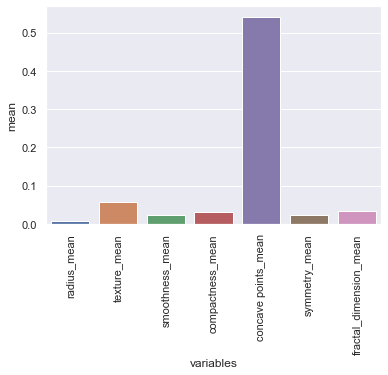

In [314]:
sns.set(font_scale=1)

feature_plot = sns.barplot(x='variables',y='mean',data=feature_imp_df)
feature_plot.set_xticklabels(feature_imp_df['variables'],rotation=90)
plt.savefig("important_variable.png")